## Information about this notebook

This example script was provided as part of the Data Management Project (INF) within the TR-172 ["ArctiC Amplification: Climate Relevant Atmospheric and SurfaCe Processes, and Feedback Mechanisms" (AC)³](http://www.ac3-tr.de/) funded by the German Research Foundation (Deutsche Forschungsgemeinschaft, DFG)

Author: Matthias Buschmann, [Institute of Environmental Physics](http://www.iup.uni-bremen.de), University of Bremen, Germany, m_buschmann@iup.physik.uni-bremen.de

Github repository: https://github.com/ac3-tr/ac3-notebooks

**Setup instructions for a reference Python Environment can be found on the [Github page](https://github.com/ac3-tr/ac3-notebooks)**

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma
import datetime as dt
from netCDF4 import Dataset
import cartopy.crs as ccrs
%matplotlib inline

# Global monthly mean chlorophyll "a" surface concentrations

## Dataset resources

**Title:**     Global monthly mean chlorophyll "a" surface concentrations from August 2002 to April 2012 for diatoms, coccolithophores and cyanobacteria from PhytoDOAS algorithm version 3.3 applied to SCIAMACHY data

**Authors**     Bracher, Astrid; Dinter, Tilman; Wolanin, Aleksandra; Rozanov, Vladimir V; Losa, Svetlana; Soppa, Mariana A 

**Year**       2017

**Institute**  Alfred Wegener Institute

**DOI**        https://doi.org/10.1594/PANGAEA.870486

**License**    [Creative Commons Attribution 3.0 Unported](http://creativecommons.org/licenses/by/3.0/ "CC-BY-3.0")

**Supplement to paper:**    Losa et al. 2017; *Synergistic Exploitation of Hyper- and Multi-Spectral Precursor Sentinel Measurements to Determine Phytoplankton Functional Types (SynSenPFT)*; Frontiers in Marine Science, https://doi.org/10.3389/fmars.2017.00203


## Abstract

This phytoplankton group (PFT) concentration a (Chl a) data are output from the algorithm PhytoDOAS version 3.3 applied to SCIAMACHY data from 2 Aug 2002 to 8 Apr 2012. Data have been gridded monthly on 0.5° latitude to 0.5°. For cyanobacteria (includes all prokaryotic phytoplankton) and diatoms the PhytoDOAS PFT retrieval algorithm by Bracher et al. (2009) and for coccolithophores the algorithm by Sadeghi et al. (2012) have been used. However, these methods have slightly been improved which includes:
- Data during SCIAMACHY instrument decontamination are excluded in the analysis.
- SCIAMACHY level-1b input data for PhytoDOAS are now version 7.04 data (instead of version 6.0).
- The wavelength window for all three phytoplankton groups (PFTs) fit factor starts at 427.5 nm (instead of 429 nm).
- Coccolithophores fit factors are retrieved in a retrieval fitting simultaneously diatoms and coccolithophores (instead of a triple fit with also fitting dinoflagellates as in Sadeghi et al. 2012).
- Vibrational Raman Scattering (VRS) is now fitted directly in the blue spectrum (450 to 495 nm), following Dinter et al. (2015), (instead of in the UV—A region as in Vountas et al. 2007) except that here the daily solar background spectrum measured by SCIAMACHY and the VRS pseudo absorption spectrum calculated based on a SCIAMACHY solar spectrum following Vountas et al. (2007) was used in order to correct for the variation of instrumental effects over time (this is not achieved when using the RTM simulated background spectrum as done in Dinter et al. 2015).
- The PFT Chl a are derived from the ratio of the PFT fit factor to the VRS fit factor multiplied by a LUT (Look Up Table). The LUT is based on radiative transfer model (RTM) SCIATRAN simulations (see Rozanov et al. 2014) accounting also for changing solar zenith angle (SZA).


## Reading example dataset

Using the link provided above, an example netCDF-file can be downloaded in the current working directory of this notebook. Then, the *Dataset* class of netCDF4 module can access the data in the .nc-file. Then the variables of interest are given appropriate variable names and read into memory. We can add a mask to unrealistic negative values, that might be present in the Coccolithophore dataset. Then the still open .nc-file can be closed. 

In [ ]:
data = Dataset('./PhytoDOAS-PFT-v3.3_201001.nc')

#print (data.variables)
#print (data.variables.keys())

DIA = data.variables['DIA'][:]
COC = data.variables['COC'][:]
COC[COC<0] = ma.masked
CYA = data.variables['CYA'][:]
lon = data.variables['Lon'][:]
lat = data.variables['Lat'][:]
data.close()


## Plotting

Using the Cartopy module, the gridded datasets can easily be plotted, e.g. on a workd map in Robinson projection.

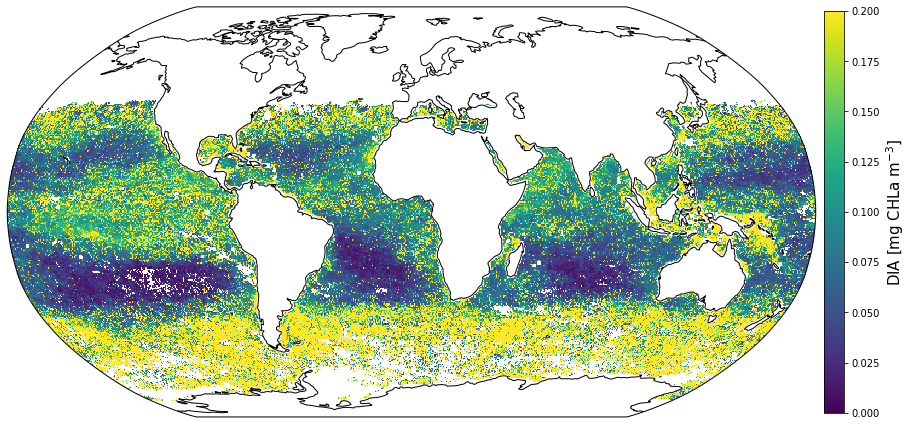

In [4]:
fig = plt.figure(figsize=(15, 8))
ax1 = fig.add_subplot(111, projection=ccrs.Robinson())
ax1.coastlines('110m')
im = ax1.imshow(DIA, extent=(-180,180,-90,90), transform=ccrs.PlateCarree(), vmin=0, vmax=0.2)
cb = fig.colorbar(im, ax=ax1, fraction=0.024, pad=0.01)
cb.set_label('DIA [mg CHLa m$^{-3}$]', fontsize=15)


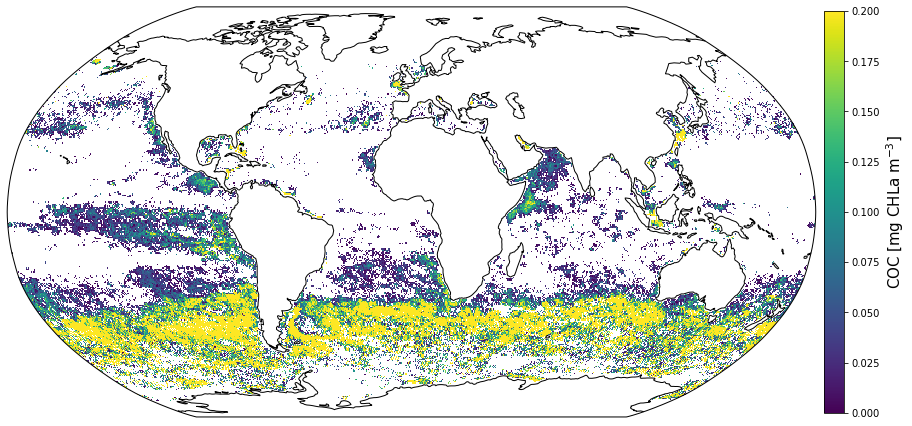

In [5]:
fig = plt.figure(figsize=(15, 8))
ax1 = fig.add_subplot(111, projection=ccrs.Robinson())
ax1.coastlines('110m')
im = ax1.imshow(COC, extent=(-180,180,-90,90), transform=ccrs.PlateCarree(), vmin=0, vmax=0.2)
cb = fig.colorbar(im, ax=ax1, fraction=0.024, pad=0.01)
cb.set_label('COC [mg CHLa m$^{-3}$]', fontsize=15)

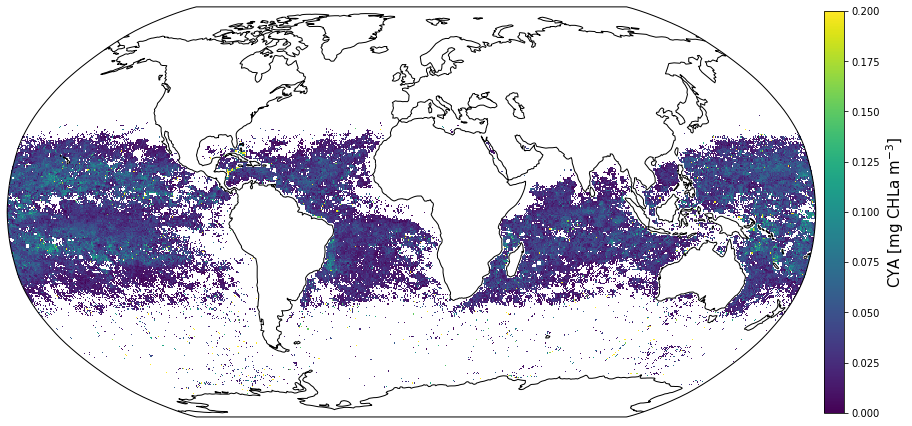

In [6]:
fig = plt.figure(figsize=(15, 8))
ax1 = fig.add_subplot(111, projection=ccrs.Robinson())
ax1.coastlines('110m')
im = ax1.imshow(CYA, extent=(-180,180,-90,90), transform=ccrs.PlateCarree(), vmin=0, vmax=0.2)
cb = fig.colorbar(im, ax=ax1, fraction=0.024, pad=0.01,)
cb.set_label('CYA [mg CHLa m$^{-3}$]', fontsize=15)